### SESSION - EDA CASE STUDY ON SMARTPHONE DATASET

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
#plt.style.available
plt.style.use('seaborn-v0_8-bright')

In [70]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [71]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [72]:
# Final dataset for EDA
df = pd.read_csv('DATASETS/EDA_SMARTPHONE/smartphone_cleaned_v5.csv')

In [73]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

#### Labeling the columns
- `categorical` : brand_name, has_5g, has_nfc, has_ir_blaster, num_cores, fast_charging_available, ram_capacity, internal_memory, refresh_rate, num_rear_cameras , num_front_cameras  , os, extended_memory_available, extended_upto
- `numerical` : price, rating, processor_speed
- `neither categorical or numerical` : model

#### Univariate Analysis
- `brand_name`

<Axes: xlabel='brand_name'>

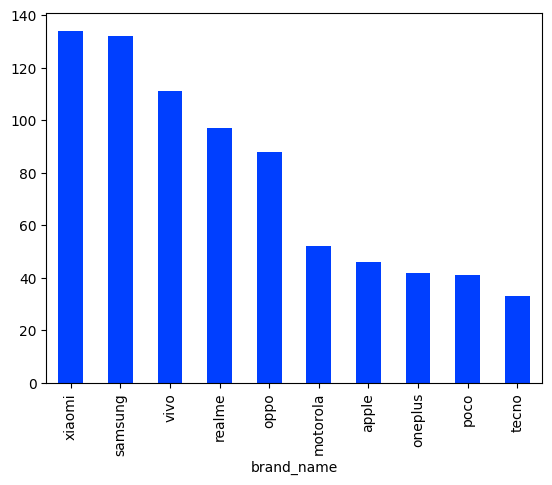

In [75]:
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

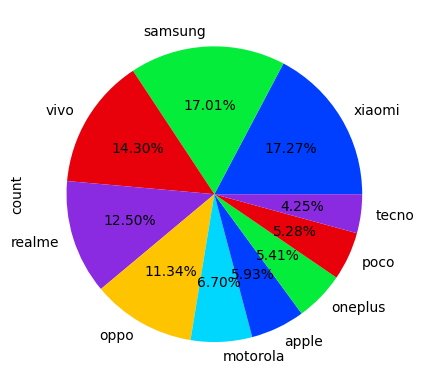

In [76]:
df['brand_name'].value_counts().head(10).plot(kind='pie', autopct='%0.2f%%')

In [77]:
# count of missing values
df['brand_name'].isnull().sum()

0

- Model

In [78]:
# model - it helps to find outlier and it is act as supporter column 
df['model'].nunique()

980

`price` column
- distribution is not normal it is skewness
- outliers : above 200000 price contain various edition
- no missing values

In [79]:
# price
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

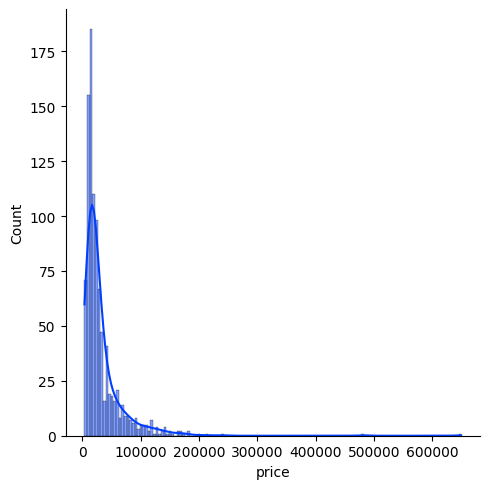

In [80]:
sns.displot(kind='hist', data=df, x='price', kde=True)

In [81]:
df['price'].skew()

6.591790999665567

<Axes: ylabel='price'>

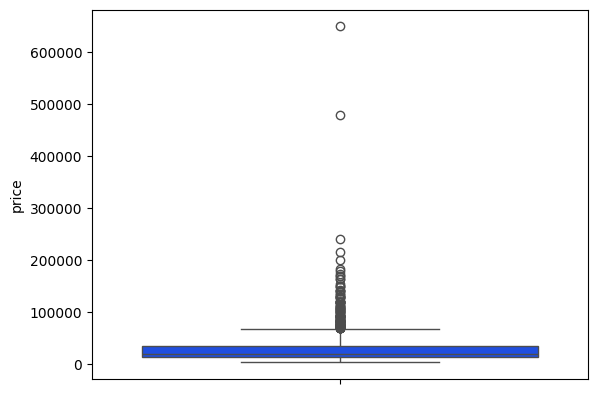

In [82]:
# outliers
sns.boxplot(df['price'])

In [83]:
df[df['price'] > 200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0


In [84]:
# missing values
df['price'].isnull().sum()

0

`rating` column
- distribution is near to normal
- no outliers
- 10% missing values

In [85]:
# rating
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

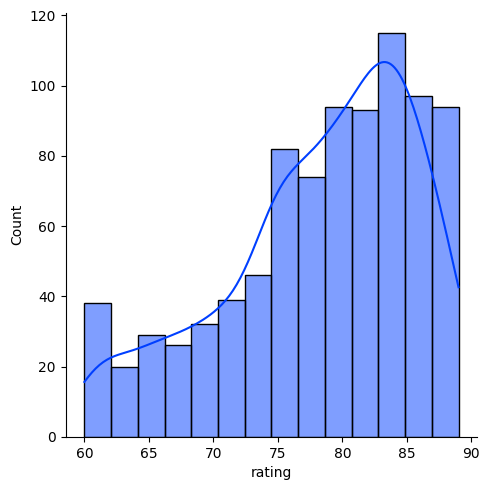

In [86]:
# distribution
sns.displot(kind='hist', data=df, x='rating', kde=True)

In [87]:
df['rating'].skew()

-0.6989993034105535

<Axes: ylabel='rating'>

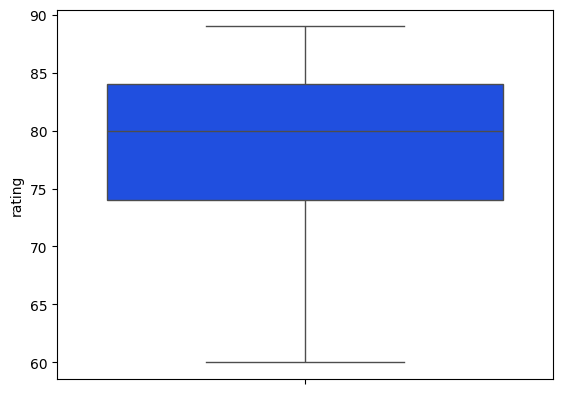

In [88]:
# outlier
sns.boxplot(df['rating'])

`has_5g`, `has_nfc` & `has_ir_blaster` columns


<Axes: ylabel='count'>

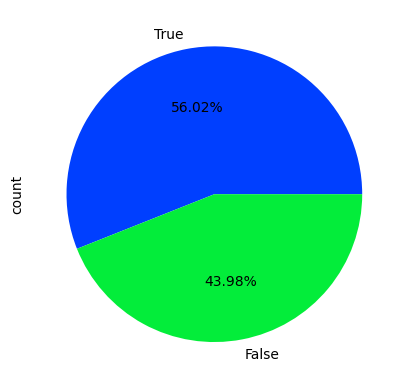

In [89]:
df['has_5g'].value_counts().plot(kind='pie', autopct="%0.2f%%")

<Axes: ylabel='count'>

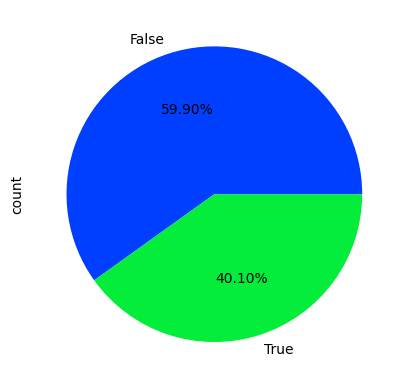

In [90]:
df['has_nfc'].value_counts().plot(kind='pie', autopct="%0.2f%%")

<Axes: ylabel='count'>

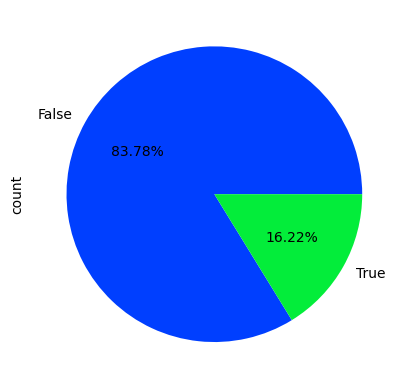

In [91]:
df['has_ir_blaster'].value_counts().plot(kind='pie', autopct="%0.2f%%")

In [92]:
# which brand contains ir blaster
df[df['has_ir_blaster'] == True]['brand_name'].value_counts()

brand_name
xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: count, dtype: int64

`processor_brand` column

<Axes: ylabel='count'>

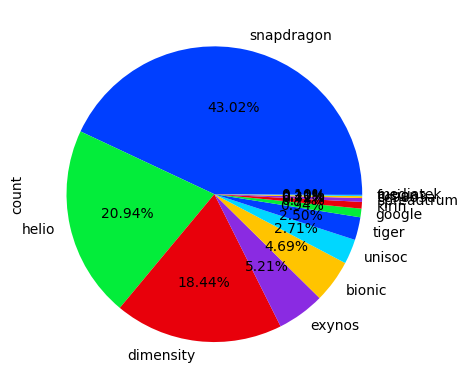

In [93]:
df['processor_brand'].value_counts().plot(kind='pie', autopct='%0.2f%%' )

`num_cores` column
- this column not effect the 

<Axes: ylabel='count'>

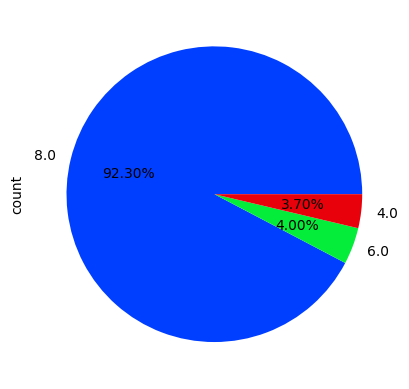

In [94]:
df['num_cores'].value_counts().plot(kind='pie', autopct='%0.2f%%' )

`fast_charging_available` column

<Axes: ylabel='count'>

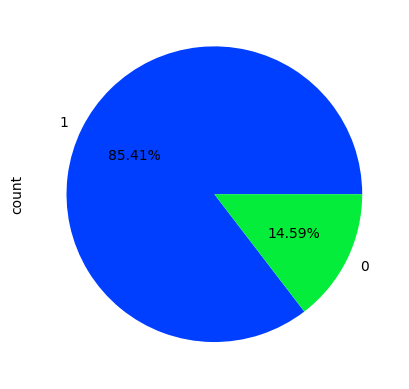

In [95]:
df['fast_charging_available'].value_counts().plot(kind='pie', autopct='%0.2f%%' )

`ram_capacity` column

<Axes: ylabel='count'>

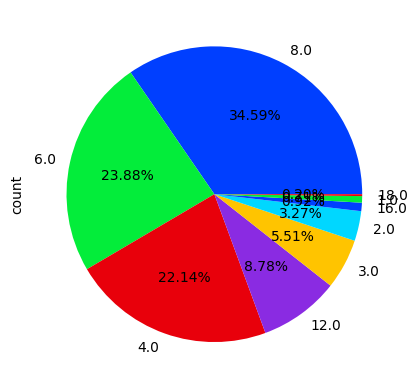

In [96]:
df['ram_capacity'].value_counts().plot(kind='pie', autopct='%0.2f%%' )

`internal_memory` column

<Axes: ylabel='count'>

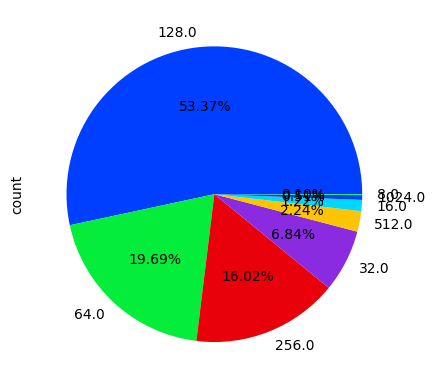

In [97]:
df['internal_memory'].value_counts().plot(kind='pie', autopct='%0.2f%%' )

`refresh_rate` column
- contain outlier

<Axes: ylabel='count'>

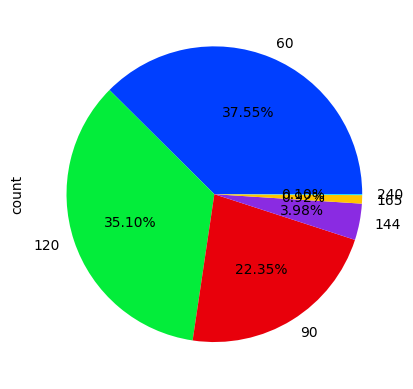

In [98]:
df['refresh_rate'].value_counts().plot(kind='pie', autopct='%0.2f%%' )

In [99]:
# outlier ?
df['refresh_rate'].value_counts()

refresh_rate
60     368
120    344
90     219
144     39
165      9
240      1
Name: count, dtype: int64

In [100]:
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,5000.0,1,25.0,6.0,128.0,6.60,120,1080 x 2408,3,1.0,android,50.0,8.0,1,1024.0
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,3279.0,1,NaN,6.0,128.0,6.10,60,1170 x 2532,2,1.0,ios,12.0,12.0,0,NaN
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,True,False,True,dimensity,8.0,2.60,4980.0,1,120.0,8.0,256.0,6.67,120,1080 x 2400,3,1.0,android,200.0,16.0,0,NaN
8,nothing,Nothing Phone 1,26749,85.0,True,True,False,snapdragon,8.0,2.50,4500.0,1,33.0,8.0,128.0,6.55,120,1080 x 2400,2,1.0,android,50.0,16.0,0,NaN
9,oneplus,OnePlus Nord 2T 5G,28999,84.0,True,True,False,dimensity,8.0,3.00,4500.0,1,80.0,8.0,128.0,6.43,90,1080 x 2400,3,1.0,android,50.0,32.0,0,NaN


<Axes: ylabel='count'>

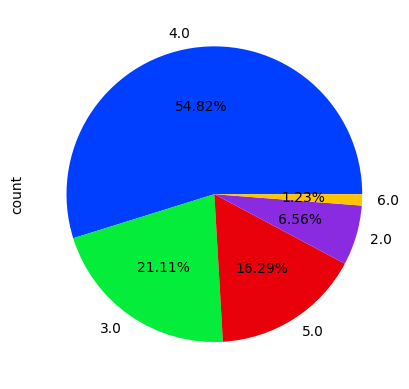

In [101]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie', autopct='%0.2f%%' )

`os` column
- it will inpact on price like ios

<Axes: ylabel='count'>

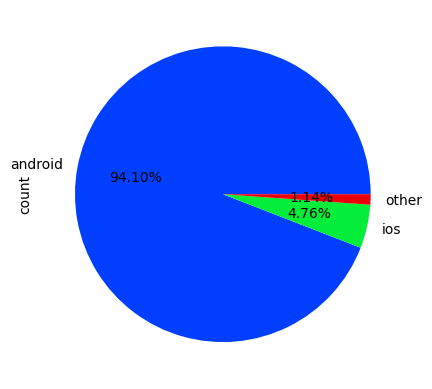

In [102]:
df['os'].value_counts().plot(kind='pie', autopct='%0.2f%%' )

`extended_memory_available` column

<Axes: ylabel='count'>

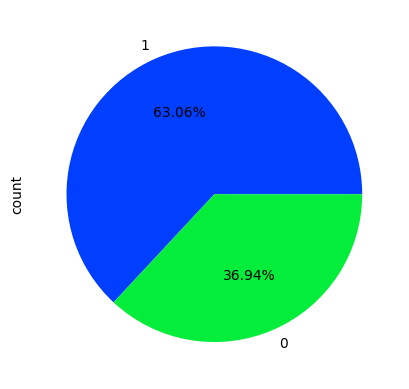

In [103]:
df['extended_memory_available'].value_counts().plot(kind='pie', autopct='%0.2f%%' )

`extened upto` column

<Axes: ylabel='count'>

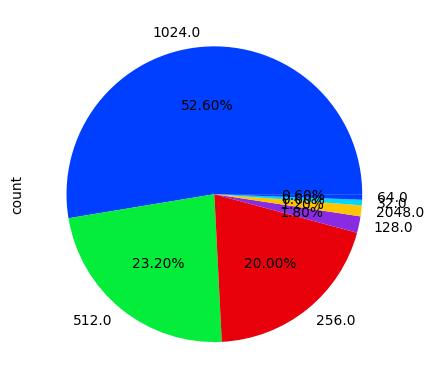

In [104]:
df['extended_upto'].value_counts().plot(kind='pie', autopct='%0.2f%%' )

#### Univarite analysis on Numerical columns
`processor_speed` column

In [105]:
# select the column it have specific int and float dtypes with their column
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

In [106]:
# function for plotting graph
def plot_graphs(column_name):
  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df,x=column_name)

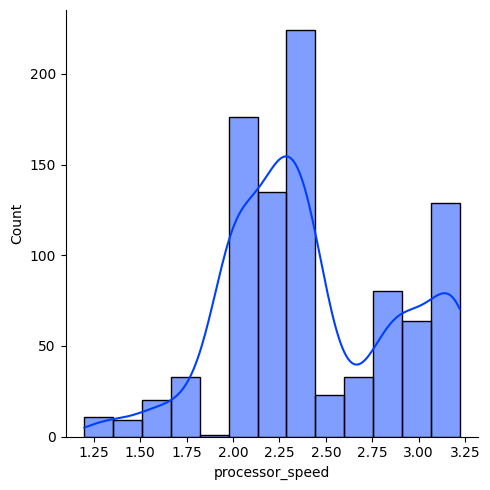

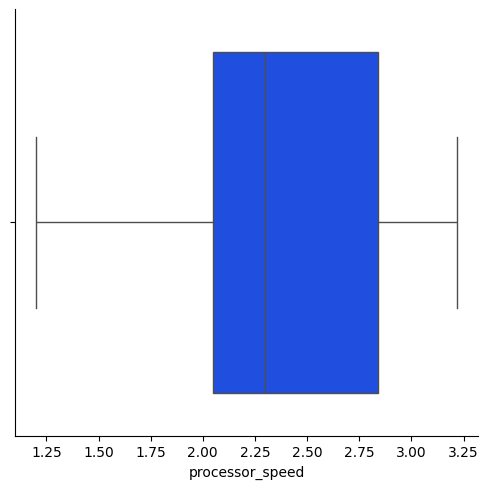

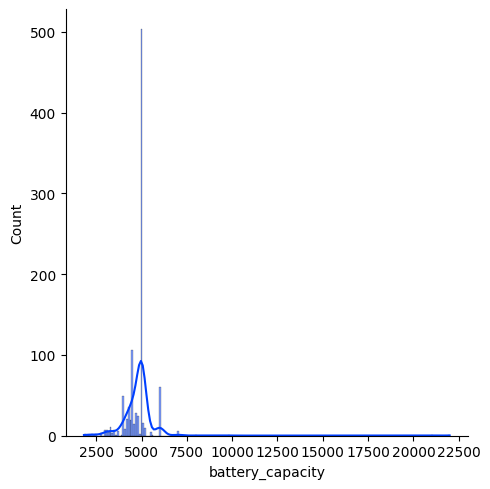

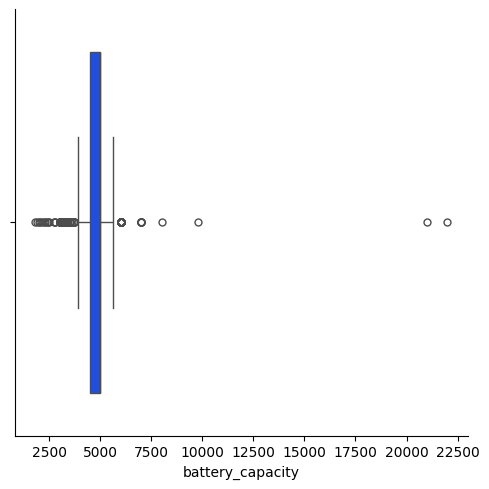

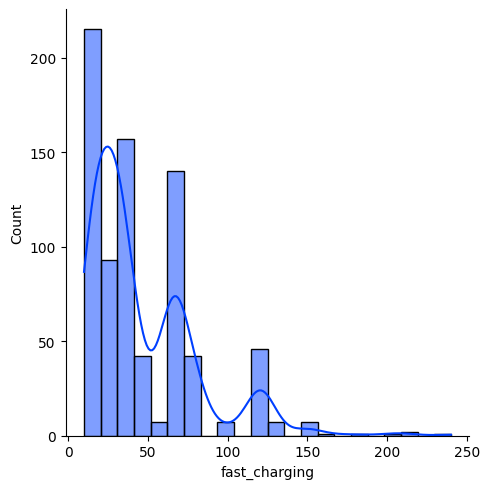

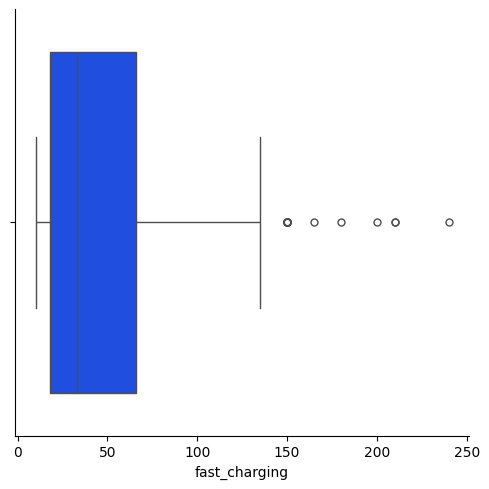

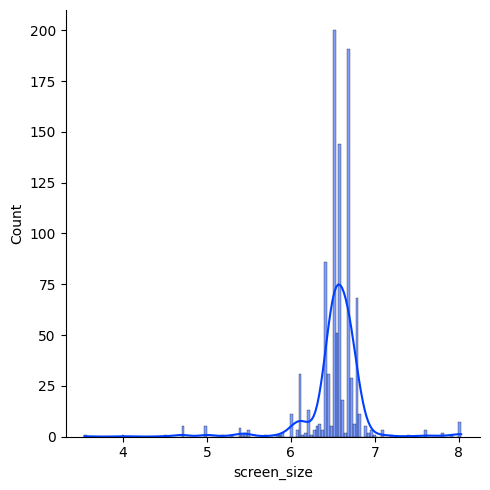

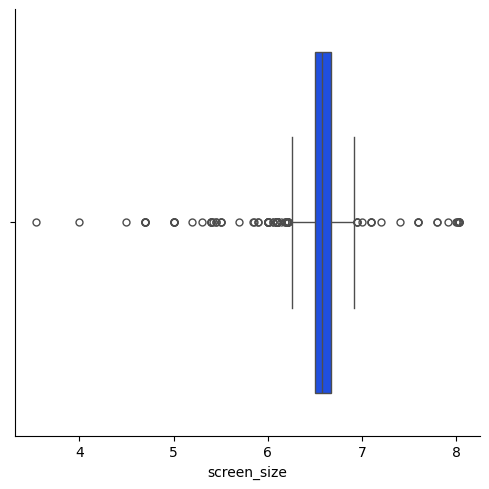

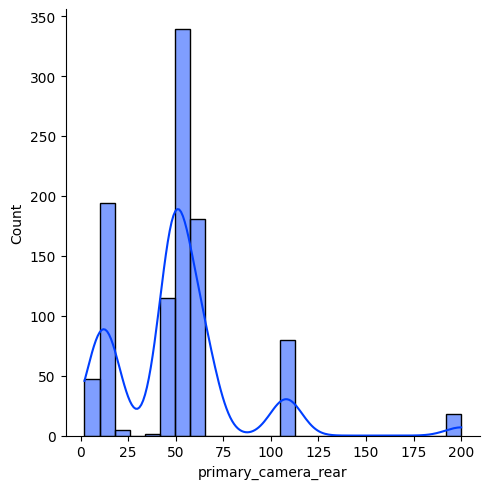

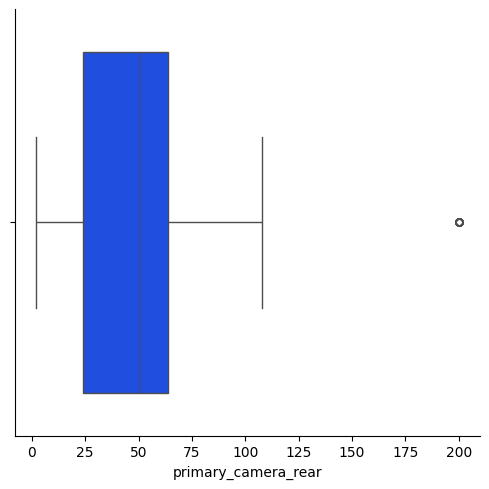

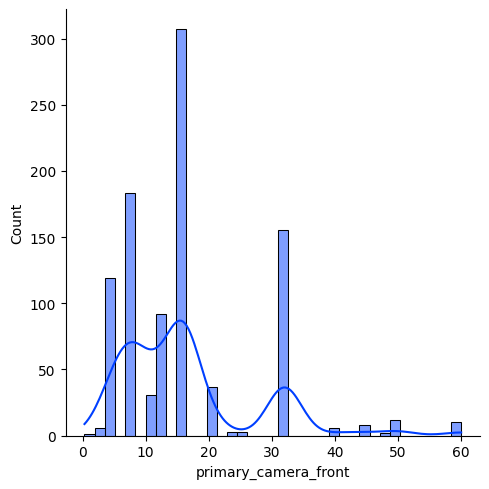

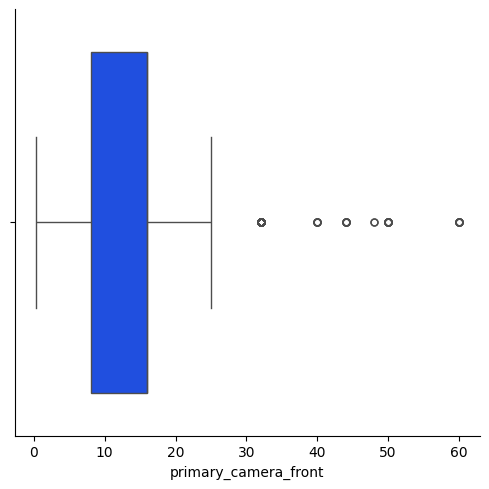

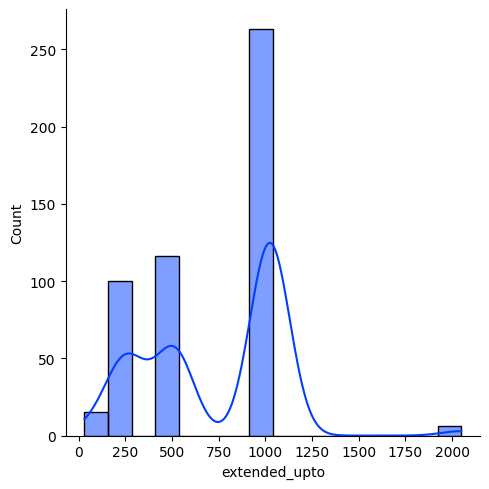

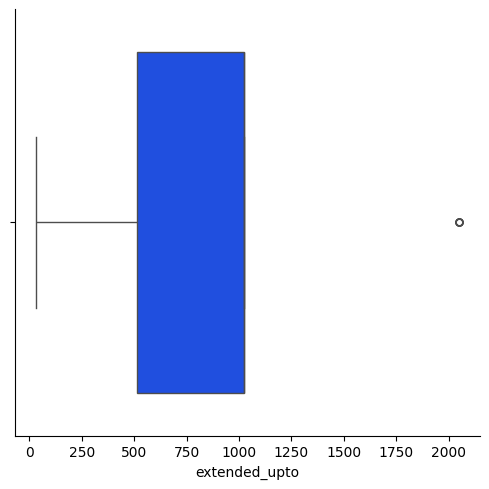

In [107]:
for col in num_columns:
    plot_graphs(col)

#### Bivarite analysis 
`brand_name` & `price` column

In [108]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

In [109]:
df.head(3)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0


C:\Users\Akash Pagi\AppData\Local\Temp\ipykernel_7912\2509778950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='brand_name', y='price', palette='deep')


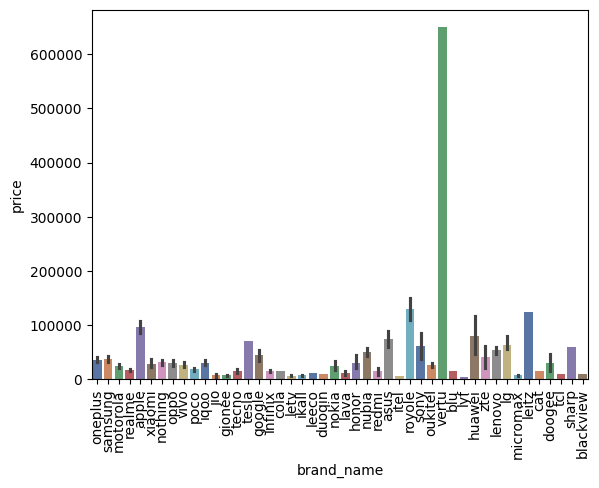

In [110]:
# numerical - categorical
# Plot the barplot with the specified palette
sns.barplot(data=df, x='brand_name', y='price', palette='deep')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [111]:
# grouped the phone that contain the more than 10 phones
x = df.groupby('brand_name').count()['model']
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

C:\Users\Akash Pagi\AppData\Local\Temp\ipykernel_7912\2893194795.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df, x='brand_name', y='price', palette='deep')


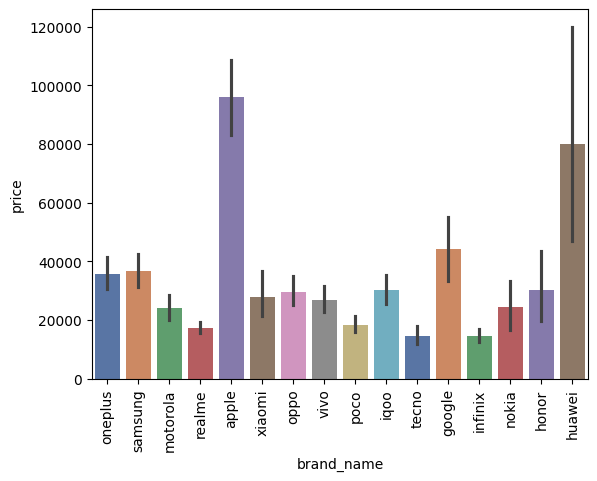

In [112]:
sns.barplot(data=temp_df, x='brand_name', y='price', palette='deep')
plt.xticks(rotation='vertical')
plt.show()

#### numerical - numerical
`price ` & `rating` column 

<Axes: xlabel='rating', ylabel='price'>

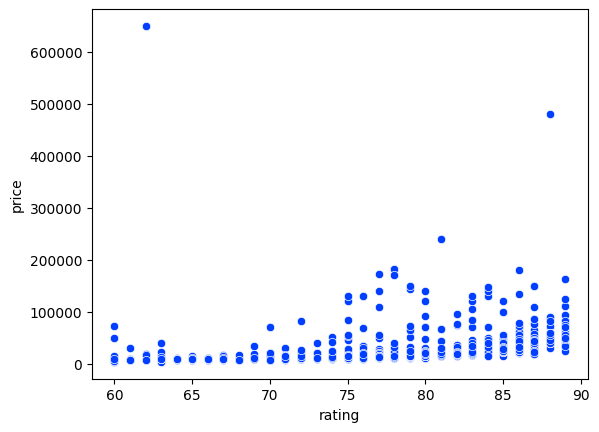

In [113]:
sns.scatterplot(df, x='rating', y='price')

<Axes: xlabel='has_5g', ylabel='price'>

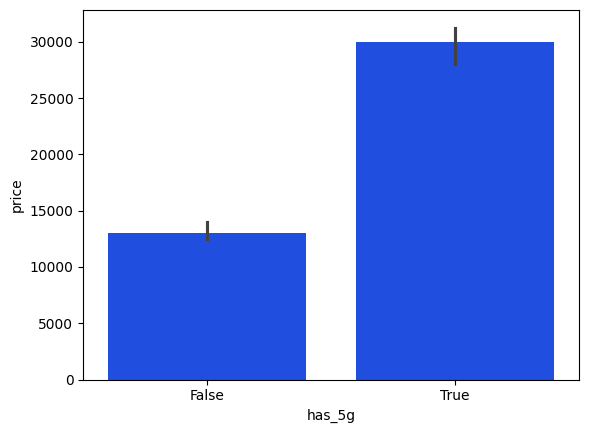

In [114]:
# 
sns.barplot(temp_df, x='has_5g', y='price', estimator=np.median)

<Axes: xlabel='has_nfc', ylabel='price'>

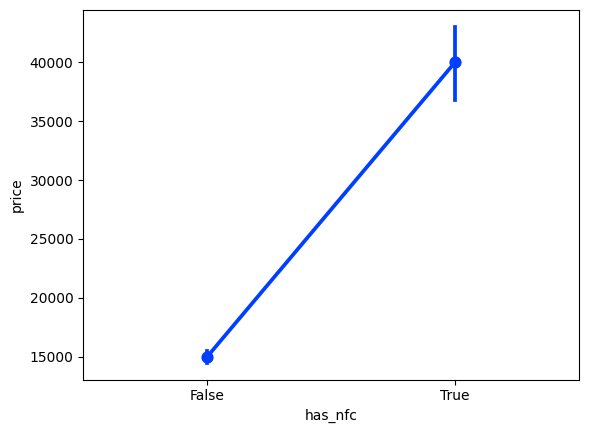

In [115]:
sns.pointplot(temp_df, x='has_nfc', y='price', estimator=np.median)

C:\Users\Akash Pagi\AppData\Local\Temp\ipykernel_7912\2935522136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp_df, x='has_ir_blaster', y='price', estimator=np.median, palette='deep')


<Axes: xlabel='has_ir_blaster', ylabel='price'>

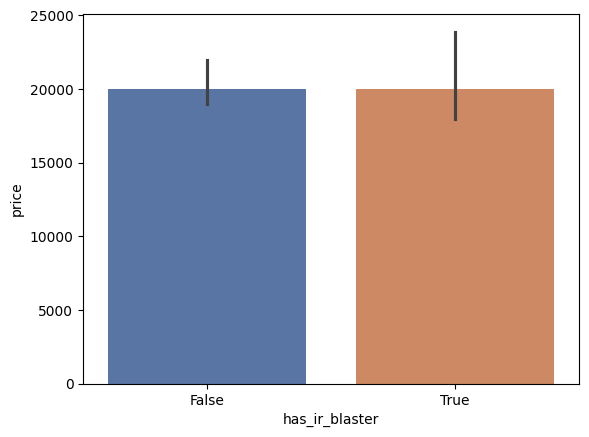

In [116]:
sns.barplot(temp_df, x='has_ir_blaster', y='price', estimator=np.median, palette='deep')

C:\Users\Akash Pagi\AppData\Local\Temp\ipykernel_7912\1708692265.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp_df, x='processor_brand', y='price', estimator=np.median,palette='deep')


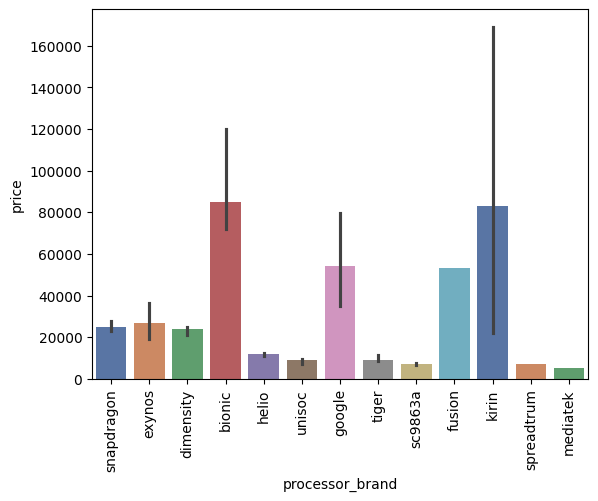

In [117]:
sns.barplot(temp_df, x='processor_brand', y='price', estimator=np.median,palette='deep')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='num_cores', ylabel='price'>

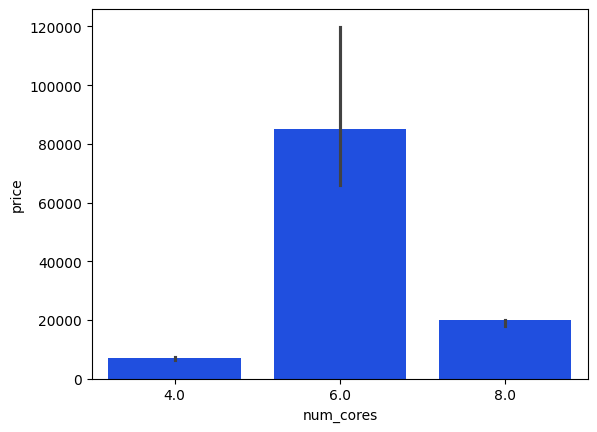

In [118]:
sns.barplot(data=temp_df,x='num_cores',y='price',estimator=np.median)

In [119]:
pd.crosstab(df['num_cores'], df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


<Axes: xlabel='processor_speed', ylabel='price'>

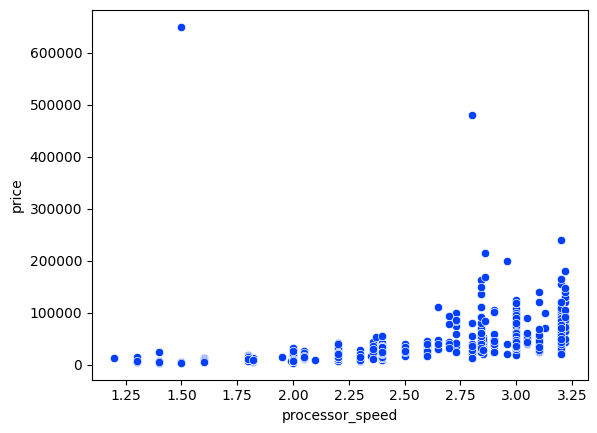

In [120]:
# numerical 
sns.scatterplot(df, x='processor_speed', y='price')

<Axes: xlabel='screen_size', ylabel='price'>

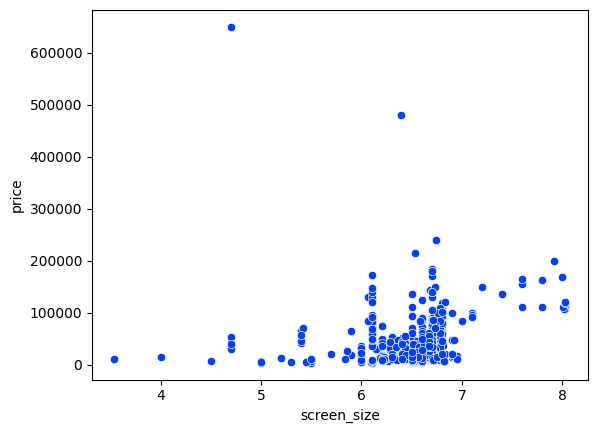

In [121]:
sns.scatterplot(df, x='screen_size', y='price')

In [122]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [179]:
temp_df = df.select_dtypes(include=['int64', 'float64'])
temp_df.corr()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
price,1.000000,0.283504,-0.048561,0.474049,-0.159232,0.116739,0.277591,0.386002,0.557168,0.113253,0.244115,0.125330,0.115228,0.092095,0.162995,-0.448628,0.091945
rating,0.283504,1.000000,0.199741,0.628446,-0.015581,0.542814,0.527613,0.757613,0.481070,0.298272,0.610795,0.515531,0.131480,0.562046,0.577861,-0.415265,0.346761
num_cores,-0.048561,0.199741,1.000000,0.192863,0.241289,0.360476,0.115413,0.303911,0.043934,0.385652,0.233010,0.343150,0.047578,0.312394,0.221483,0.072934,0.198742
processor_speed,0.474049,0.628446,0.192863,1.000000,-0.041930,0.345856,0.615657,0.627234,0.525510,0.290366,0.555004,0.255476,0.124191,0.281204,0.398207,-0.663085,0.259733
battery_capacity,-0.159232,-0.015581,0.241289,-0.041930,1.000000,0.128993,-0.078096,0.085690,-0.001444,0.348805,0.088636,0.155410,-0.072366,0.171465,-0.005111,0.174683,0.238755
fast_charging_available,0.116739,0.542814,0.360476,0.345856,0.128993,1.000000,NaN,0.439538,0.279877,0.346687,0.415278,0.470952,0.072208,0.427440,0.331769,-0.166626,0.333016
fast_charging,0.277591,0.527613,0.115413,0.615657,-0.078096,NaN,1.000000,0.533602,0.380985,0.258955,0.546374,0.126803,0.012674,0.390718,0.392673,-0.563131,0.026669
ram_capacity,0.386002,0.757613,0.303911,0.627234,0.085690,0.439538,0.533602,1.000000,0.592332,0.396613,0.573977,0.384908,0.167176,0.431377,0.519891,-0.482666,0.280564
internal_memory,0.557168,0.481070,0.043934,0.525510,-0.001444,0.279877,0.380985,0.592332,1.000000,0.276401,0.380263,0.236609,0.154839,0.200656,0.256869,-0.397903,0.232860
screen_size,0.113253,0.298272,0.385652,0.290366,0.348805,0.346687,0.258955,0.396613,0.276401,1.000000,0.333411,0.371769,0.076910,0.329288,0.214725,-0.094878,0.265277


<Axes: >

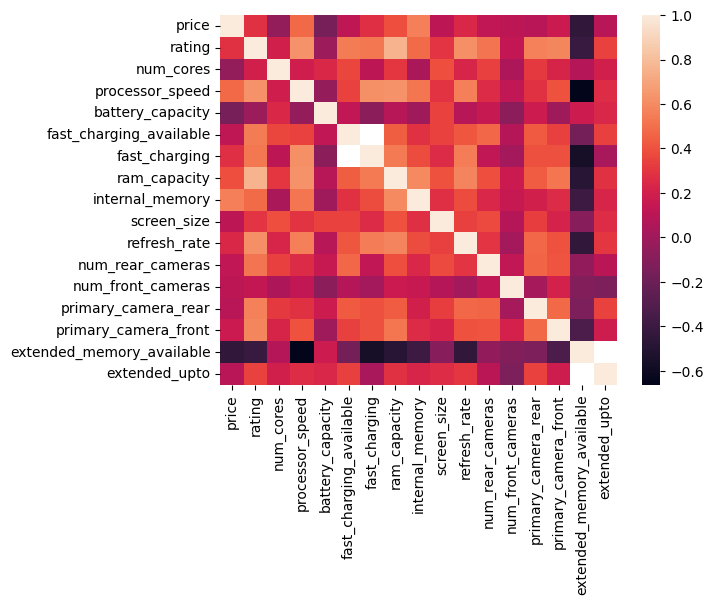

In [180]:
sns.heatmap(temp_df.corr())

In [181]:
temp_df.corr()['price']

price                        1.000000
rating                       0.283504
num_cores                   -0.048561
processor_speed              0.474049
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.277591
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
num_front_cameras            0.115228
primary_camera_rear          0.092095
primary_camera_front         0.162995
extended_memory_available   -0.448628
extended_upto                0.091945
Name: price, dtype: float64

In [182]:
temp_df.isnull().sum()

price                          0
rating                       101
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [183]:
# Rating depends on all the numerical columns
temp_df.corr()['rating']

price                        0.283504
rating                       1.000000
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577861
extended_memory_available   -0.415265
extended_upto                0.346761
Name: rating, dtype: float64

<Axes: xlabel='processor_speed', ylabel='price'>

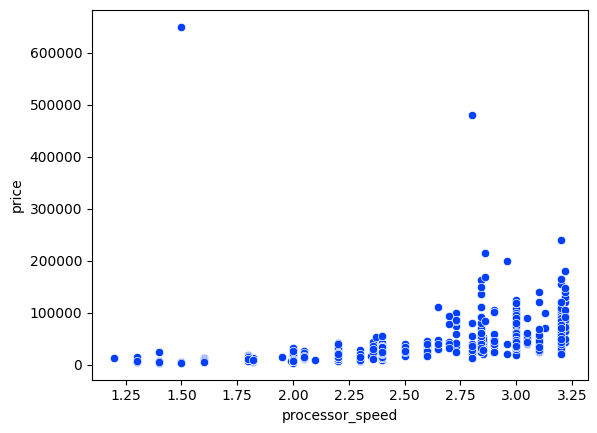

In [184]:
sns.scatterplot(data=df, x='processor_speed', y='price')

#### KNN imputer
- to fill the missing values in column we take help of other columns
- works on only numerical columns

In [185]:
df.shape

(980, 25)

In [186]:
# KNN imputer
x_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['price'])

In [187]:
# importing KNNimputer
# !pip install scikit-learn
from sklearn.impute import KNNImputer

In [188]:
imputer = KNNImputer(n_neighbors=5)

In [189]:
x_df_values = imputer.fit_transform(x_df)

In [190]:
x_df = pd.DataFrame(x_df_values, columns=x_df.columns)

In [191]:
# add price column
x_df['price'] = df['price']

In [192]:
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,870.4,54999
1,81.0,8.0,2.2,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,19989
2,75.0,8.0,2.4,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,16499
3,81.0,8.0,2.2,5000.0,1.0,29.2,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,14999
4,82.0,8.0,2.6,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,24999


In [193]:
a = x_df.corr()['price'].reset_index()

In [194]:
b = temp_df.corr()['price'].reset_index()

In [195]:
# mering a & b
b.merge(a, on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.341727
2,num_cores,-0.048561,-0.055949
3,processor_speed,0.474049,0.488426
4,battery_capacity,-0.159232,-0.166257
5,fast_charging_available,0.116739,0.116739
6,fast_charging,0.277591,0.220688
7,ram_capacity,0.386002,0.386002
8,internal_memory,0.557168,0.557168
9,screen_size,0.113253,0.113253


#### convert into number 

In [203]:
pd.get_dummies(df, columns=['brand_name', 'processor_brand', 'os'], drop_first=True).shape

(980, 81)